## Algoritmo KNN

El algoritmo KNN (K Nearest Neighbors) trata de buscar los K puntos más cercanos a un punto concreto para poder inferir su valor.

In [1]:
# Importamos las librerías necesarias para el análisis con KNN
import matplotlib.pyplot as plt  # Para crear visualizaciones
import pandas as pd              # Para manipular datos estructurados
import seaborn as sns           # Para gráficos estadísticos avanzados
from sklearn.neighbors import KNeighborsClassifier  # Algoritmo KNN

Tenemos la altura y el peso de cinco personas, junto con su respectivo género (Hombre o mujer).

In [2]:
# Creamos un dataset simple con peso, altura y género de 5 personas
# Este será nuestro conjunto de entrenamiento para el algoritmo KNN
data = {'Peso': [50, 80, 90, 50, 60],      # Peso en kg
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],  # Altura en metros
        'Genero': ['m', 'h', 'h', 'm', 'm']}       # Género: 'm'=mujer, 'h'=hombre

# Convertimos el diccionario a DataFrame para facilitar el manejo
df = pd.DataFrame(data)
df

,Peso,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,50,1.55,m
4,60,1.60,m


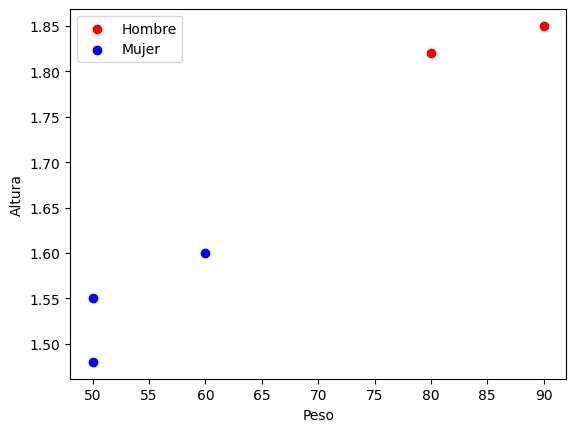

In [3]:
# VISUALIZACIÓN DE LOS DATOS DE ENTRENAMIENTO
# Creamos un gráfico de dispersión para ver la distribución de hombres y mujeres

# Creamos los ejes del gráfico
ax = plt.axes()

# Graficamos los puntos de HOMBRES en color rojo
# Filtramos el DataFrame donde Genero == 'h' y extraemos Peso y Altura
ax.scatter(df.loc[df['Genero'] == 'h', 'Peso'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")

# Graficamos los puntos de MUJERES en color azul
# Filtramos el DataFrame donde Genero == 'm' y extraemos Peso y Altura
ax.scatter(df.loc[df['Genero'] == 'm', 'Peso'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

# Etiquetas de los ejes
plt.xlabel("Peso")
plt.ylabel("Altura")

# Mostramos la leyenda para identificar cada grupo
ax.legend();

Si nos dieran datos de una sexta persona, pero no nos dieran su género, ¿Podríamos adivinarlo de alguna forma?

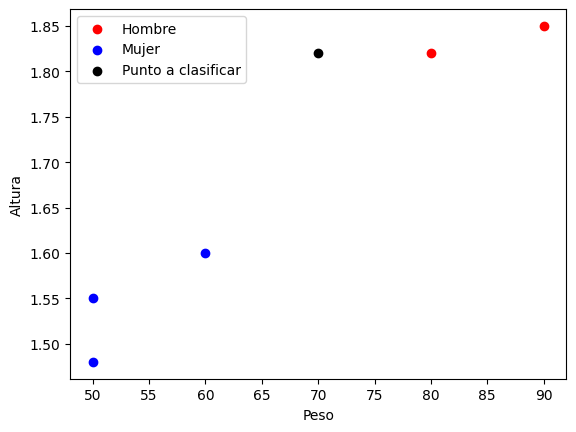

In [4]:
# AÑADIMOS UN NUEVO PUNTO SIN CLASIFICAR
# Creamos una nueva persona con peso=70kg y altura=1.82m
# ¿Será hombre o mujer según el algoritmo KNN?
punto_nuevo = {'Peso': [70],
               'Altura': [1.82]}

# Convertimos a DataFrame para poder usarlo con sklearn
punto_nuevo = pd.DataFrame(punto_nuevo)

# VISUALIZAMOS EL NUEVO PUNTO JUNTO CON LOS DATOS EXISTENTES
ax = plt.axes()

# Graficamos los hombres (rojo)
ax.scatter(df.loc[df['Genero'] == 'h', 'Peso'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")

# Graficamos las mujeres (azul)
ax.scatter(df.loc[df['Genero'] == 'm', 'Peso'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

# Graficamos el NUEVO PUNTO en NEGRO (sin clasificar aún)
ax.scatter(punto_nuevo['Peso'],
           punto_nuevo['Altura'],
           c="black",
           label="Punto a clasificar")

plt.xlabel("Peso")
plt.ylabel("Altura")
ax.legend();

In [5]:
# Implementamos el algoritmo K-Nearest Neighbors (KNN)
# n_neighbors=3: consideramos los 3 vecinos más cercanos para la clasificación
knn = KNeighborsClassifier(n_neighbors=3)

# Definimos las características de entrada (peso y altura)
X = df[['Peso', 'Altura']]
# Variable objetivo (género)
y = df['Genero']

# Entrenamos el modelo KNN con nuestros datos
knn.fit(X, y)

# Hacemos predicción para el nuevo punto (peso=70, altura=1.82)
# El algoritmo busca los 3 puntos más cercanos y asigna la clase más frecuente
prediction = knn.predict(punto_nuevo)
print(prediction)

['h']


In [6]:
# Bucle simple para entender el rango
# Este for recorre los valores de 1 a 5 (sin incluir el 6)
# Lo usamos para probar diferentes valores de K en el siguiente ejemplo
for k in range(1,6):
    print(k)

1
2
3
4
5


In [7]:
# Experimentamos con diferentes valores de K para ver cómo afecta las predicciones
# Probamos K desde 1 hasta 5 (todos los puntos disponibles)
for k in range(1,6):
    # Creamos un nuevo clasificador KNN con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k)
    # Entrenamos con nuestros datos
    knn.fit(X,y)
    print('K=',k)
    # Predecimos para el mismo punto con diferentes valores de K
    print(knn.predict(punto_nuevo))
    print('-'*50)

K= 1
['h']
--------------------------------------------------
K= 2
['h']
--------------------------------------------------
K= 3
['h']
--------------------------------------------------
K= 4
['h']
--------------------------------------------------
K= 5
['m']
--------------------------------------------------


In [8]:
# CLASES IDENTIFICADAS POR EL MODELO
# El atributo .classes_ muestra las categorías únicas que el modelo aprendió
# En este caso: 'h' (hombre) y 'm' (mujer)
knn.classes_

array(['h', 'm'], dtype=object)

Documentacion: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
